In [2]:
##import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sqlalchemy import create_engine

## import credential
from gitignore import URLsql

In [4]:
## create engine
engine = create_engine(URLsql)

In [5]:
##connect engine

connection = engine.connect()

In [9]:
employee_pd = pd.read_sql("SELECT * FROM employees", connection)
employee_pd.head(10)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
5,263976,e0003,1959-10-30,Eran,Cusworth,M,1986-11-14
6,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28
7,461591,s0002,1964-11-17,Xudong,Samarati,M,1985-11-13
8,477657,e0002,1962-12-18,Lihong,Magliocco,M,1993-10-23
9,219881,s0002,1956-04-24,Kwangyoen,Speek,F,1993-02-14


In [10]:
salaries_pd = pd.read_sql("SELECT * FROM salaries", connection)
salaries_pd.head(10)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
5,10006,40000
6,10007,56724
7,10008,46671
8,10009,60929
9,10010,72488


In [11]:
##check for any NaN values
employee_pd.isnull().sum()
employee_pd.count()

emp_no          300024
emp_title_id    300024
birth_date      300024
first_name      300024
last_name       300024
sex             300024
hire_date       300024
dtype: int64

In [13]:
merged_df = pd.merge(employee_pd,salaries_pd,on='emp_no')
merged_df.head(10)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000
5,263976,e0003,1959-10-30,Eran,Cusworth,M,1986-11-14,40000
6,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087
7,461591,s0002,1964-11-17,Xudong,Samarati,M,1985-11-13,40000
8,477657,e0002,1962-12-18,Lihong,Magliocco,M,1993-10-23,54816
9,219881,s0002,1956-04-24,Kwangyoen,Speek,F,1993-02-14,40000


Text(0.5, 1.0, 'Histogram of Salary Ranges in Employee SQL challenge')

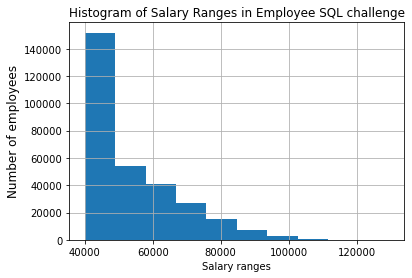

In [14]:
# create histogram

merged_df.hist( column='salary')
plt.ylabel("Number of employees", fontsize=12)
plt.xlabel("Salary ranges")
plt.title("Histogram of Salary Ranges in Employee SQL challenge")

In [15]:
## get df for titles
titles_pd = pd.read_sql("SELECT * FROM titles", connection)
titles_pd

,titles_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [16]:
##join the two df based on "emp_title_id" and "titles_id" both have corresponding values however 
## with different headers

complete_df = merged_df.merge(titles_pd, left_on='emp_title_id', right_on='titles_id')
complete_df.head(10)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,titles_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,s0001,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,s0001,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,s0001,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,s0001,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,s0001,Staff
5,476443,s0001,1952-08-27,Ziya,Asmuth,M,1995-08-24,63371,s0001,Staff
6,424270,s0001,1963-01-15,Kellyn,Yoshizawa,F,1995-05-08,60678,s0001,Staff
7,427958,s0001,1957-05-03,Feixiong,Poujol,F,1985-05-11,63377,s0001,Staff
8,280408,s0001,1964-09-19,Elliott,Perl,M,1987-10-29,75963,s0001,Staff
9,229010,s0001,1961-11-12,Mark,Cappelli,M,1990-05-07,40000,s0001,Staff


In [17]:
avgsalarygb_df = complete_df.groupby('title').mean()
avgsalarygb_df

,emp_no,salary
title,,
Assistant Engineer,252992.595373,48564.434447
Engineer,253654.345919,48535.336511
Manager,110780.833333,51531.041667
Senior Engineer,253038.749885,48506.799871
Senior Staff,254481.798969,58550.172704
Staff,253408.503604,58465.382850
Technique Leader,251811.432730,48582.896092


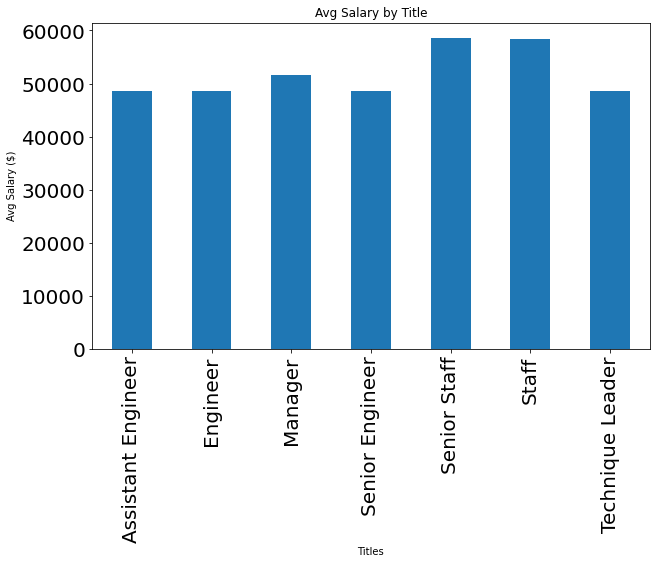

In [18]:
#Create a bar chart of average salary by title.

bar_chart = avgsalarygb_df['salary'].plot(kind='bar', 
                            figsize=(10, 6), 
                            ylabel="Avg Salary ($)", 
                            xlabel = "Titles",
                            title ="Avg Salary by Title", 
                            fontsize = 20)